In [76]:
import numpy as np
import cv2
import PIL
from PIL import Image
from matplotlib import pyplot as plt

# Loading All Images

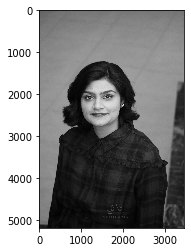

In [77]:
myImage = cv2.imread('me.jpg',1)
myImage = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)
plt.imshow(myImage,'gray')
plt.show()

# Resizing Cap Image

Resized Image Dimension:  (850, 1500)


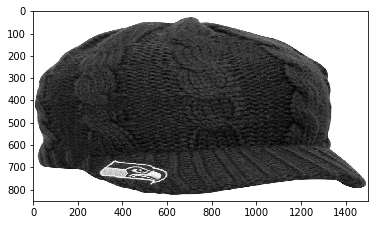

In [78]:
#Tried to make the background transparent. but doesnt work.
img = Image.open('cap.jpg')
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)
img.putdata(newData)
img.save("cap1.png")

myCap = cv2.imread('cap1.png',1)
myCap = cv2.cvtColor(myCap, cv2.COLOR_BGR2GRAY)
scale_percent = 60 # percent of original size
width = 1500
height = 850
dim = (width, height)

# resize image
myCap = cv2.resize(myCap, dim, interpolation = cv2.INTER_AREA)
print('Resized Image Dimension: ',myCap.shape )

plt.imshow(myCap,'gray')
plt.show()


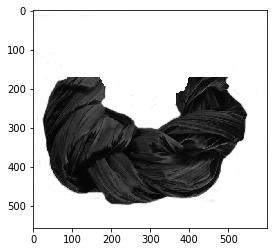

In [79]:
myScarf = cv2.imread('scarf.jpg',1)
myScarf = cv2.cvtColor(myScarf, cv2.COLOR_BGR2GRAY)
plt.imshow(myScarf,'gray')
plt.show()

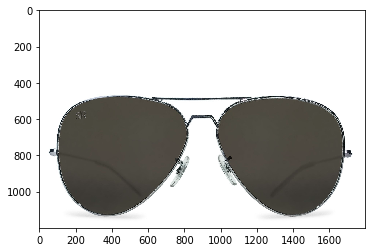

In [80]:
myShades = cv2.imread('shades.jpg',1)
#myShades = cv2.cvtColor(myShades, cv2.COLOR_BGR2GRAY)
plt.imshow(myShades,'gray')
plt.show()

In [81]:
print('Original Dimensions of myImage : ',myImage.shape)
print('Original Dimensions of myScarf: ',myScarf.shape)
print('Original Dimensions of myCap: ',myCap.shape)
print('Original Dimensions of myShades: ',myShades.shape)

Original Dimensions of myImage :  (5184, 3456)
Original Dimensions of myScarf:  (557, 600)
Original Dimensions of myCap:  (850, 1500)
Original Dimensions of myShades:  (1200, 1800, 3)


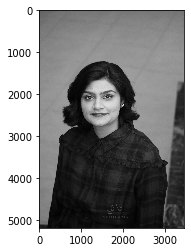

In [82]:
width, height = myImage.shape
  
# Setting the points for cropped image 
x = 5
y = 1100
w = 3000
h = 4000
  
# Cropped image of above dimension 
# (It will not change orginal image) 
resizedMyImage = myImage[y:y+h, x:x+w] 
plt.imshow(myImage,'gray')
plt.show()

Resized Image Dimension:  (4000, 3000)


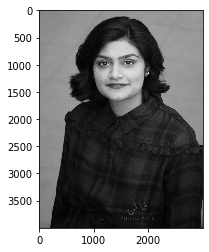

In [83]:
scale_percent = 60 # percent of original size
width = 1850
height = 2000
dim = (width, height)

# resize image
#resizedMyImage = cv2.resize(myImage, dim, interpolation = cv2.INTER_AREA)
print('Resized Image Dimension: ',resizedMyImage.shape )
plt.imshow(resizedMyImage,'gray')
plt.show()

# Scarf worn using Image Masking. 

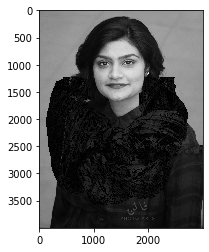

In [84]:
resizedMyScarf = cv2.resize(myScarf, resizedMyImage.shape[1::-1])

oneResult = cv2.bitwise_and(resizedMyImage, resizedMyScarf)
plt.imshow(oneResult,'gray')
plt.show()

# Cropping Eyes then fitting Shades by using alpha blending

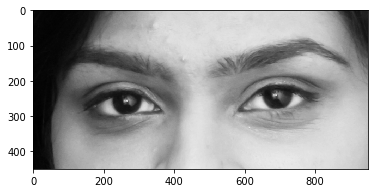

True

In [85]:
x = 940
y = 720
w = 950
h = 450
  
# Cropped image of above dimension 
# (It will not change orginal image) 
croppedResultant = oneResult[y:y+h, x:x+w] 
plt.imshow(croppedResultant,'gray')
plt.show()
cv2.imwrite('croppedEyes.png', croppedResultant)

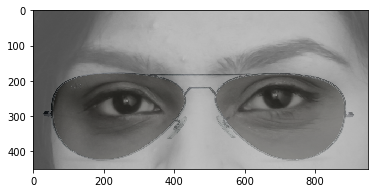

True

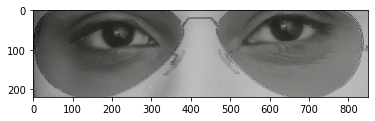

In [86]:
croppedResultant = cv2.imread('croppedEyes.png')

resizedMyGlasses = cv2.resize(myShades, croppedResultant.shape[1::-1])

newGlasses = cv2.addWeighted(croppedResultant, 0.54, resizedMyGlasses, 0.3, 0)
plt.imshow(newGlasses,'gray')
plt.show()
x = 50
y = 200
w = 850
h = 220
  
# Cropped image of above dimension 
# (It will not change orginal image) 
croppedResultant = newGlasses[y:y+h, x:x+w] 
plt.imshow(croppedResultant,'gray')
cv2.imwrite('refined.png', croppedResultant)

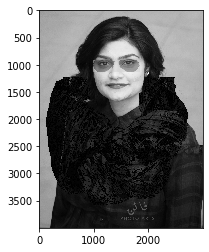

True

In [87]:
refined = cv2.imread('refined.png',1)
refined = cv2.cvtColor(refined, cv2.COLOR_BGR2GRAY)
refinedArr = np.asarray(refined)
myImageArr = np.asarray(oneResult)
x_offset = 940+50
y_offset = 720+200
myImageArr[y_offset:y_offset+refinedArr.shape[0], x_offset:x_offset+refinedArr.shape[1]] = refinedArr
plt.imshow(myImageArr , cmap = matplotlib.cm.Greys_r) 
plt.show()
cv2.imwrite('SecondR.png',myImageArr)

# Wearing Cap by applying arthimetics.

In [88]:
arrayImageCap = np.array(myCap)

import matplotlib
import matplotlib.pyplot as plt
nextImage = Image.open('secondR.png').convert('L')
tempMyImageArr = np.array(nextImage)
myImageArr = np.array(nextImage)


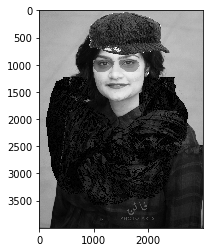

In [92]:
x_offset = 900
y_offset = 0
myImageArr[y_offset:y_offset+arrayImageCap.shape[0], x_offset:x_offset+arrayImageCap.shape[1]] = arrayImageCap

for i in range(tempMyImageArr.shape[0]):
    for j in range(tempMyImageArr.shape[1]):
            if(myImageArr[i][j]>=220):
                myImageArr[i][j] = tempMyImageArr[i][j]
plt.imshow(myImageArr , cmap = matplotlib.cm.Greys_r) 
plt.show()

resultantImage = cv2.imwrite('resultant.png', myImageArr )
